<center>
<h1>COURSE CODE : PH6130
<h1>SAI KRISHNA
<h1>PH22MSCST11003


<h1>QUESTION 1
    <h4>In the class, we demonstrated the Central Limit Theorem for a sample drawn from a uniform distribution.
Reproduce a similar plot for a sample drawn the from chi-square distribution with degrees of freedom
equal to 3, for samples drawn once, 5 times, and 10 times. Either plot all of these on one multipanel figure
similar to AstroML figure 3.20.

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

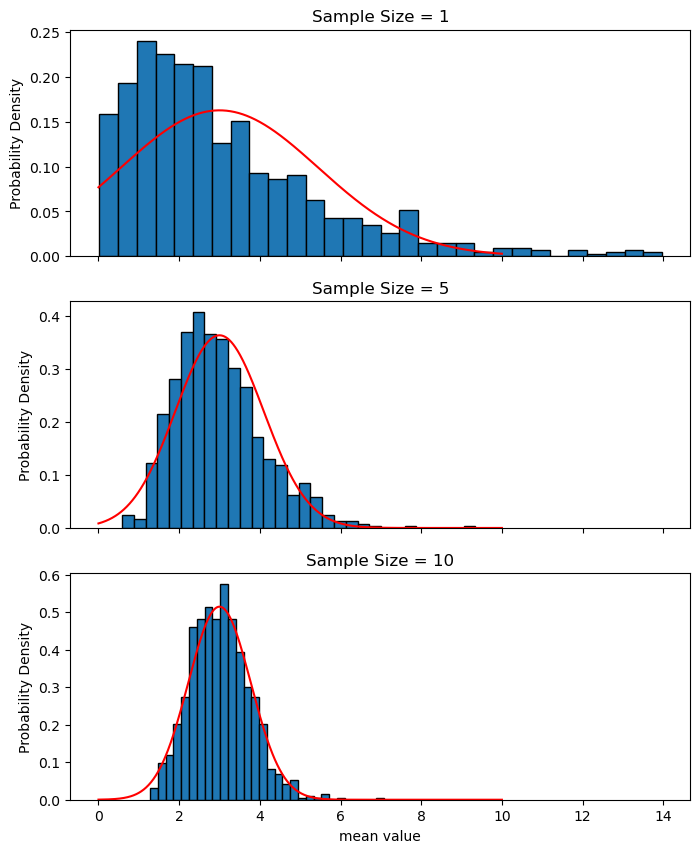

In [8]:

def v(size):
    s=np.random.chisquare(df, size=(1000, size))
    means = np.mean(s, axis=1)
    
    mu = df
    sigma = np.sqrt(2 * df / size)  # Standard deviation for the sample mean
    x_pdf = np.linspace(0, 10, 1000)
    pdf = norm(mu, sigma).pdf(x_pdf)
    return means,pdf
    

df = 3 
np.random.seed(42)

# Initialize subplots
fig, a = plt.subplots(3, 1, figsize=(8, 10), sharex=True)
    

c1,p1=v(1)
c5,p5=v(5)
c10,p10=v(10)
a[0].hist(c1,bins=30,density=True,edgecolor="black")
a[1].hist(c5,bins=30,density=True,edgecolor="black")
a[2].hist(c10,bins=30,density=True,edgecolor="black")

a[0].plot(np.linspace(0, 10, 1000),p1,color='red')
a[1].plot(np.linspace(0, 10, 1000),p5,color='red')
a[2].plot(np.linspace(0, 10, 1000),p10,color='red')

a[0].set_title(f'Sample Size = {1}')
a[0].set_ylabel('Probability Density')
a[1].set_title(f'Sample Size = {5}')
a[1].set_ylabel('Probability Density')
a[2].set_title(f'Sample Size = {10}')
a[2].set_ylabel('Probability Density')
a[2].set_xlabel("mean value")
plt.show()

<h1> QUESTION 2
    <h4>The luminosity and redshift of galaxy clusters from XMM-BCS survey (details available at arXiv:1512.01244)
can be downloaded http://www.iith.ac.in/~shantanud/test.dat. Plot the luminosity as a function
of redshift on a log-log scale. By eye, do you think the datasets are correlated? Calculate the Spearman,
Pearson and Kendall-tau correlation coefficients and the p-value for the null hypothesis.

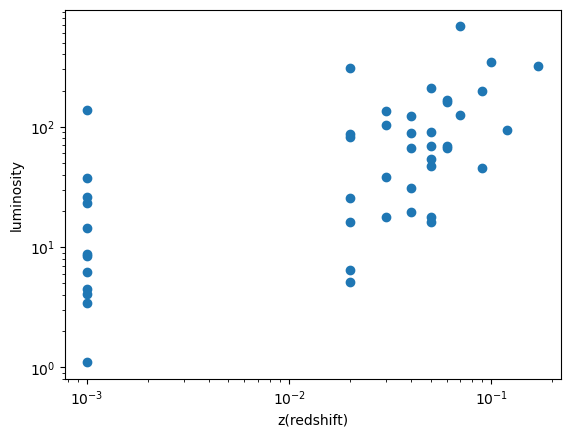

 correlation coefficient using pearson : 0.5144497852670242 

 p_value using pearsonr: 0.0002546471657612427 

 correlation coefficient using Spearman, : 0.6596325957535454 

 p_value using spearmanr : 6.166489759081011e-07 

 correlation coefficient using kendalltau : 0.5029584682704178 

 p_value using kendalltau : 2.9696862274734036e-06


In [10]:
import scipy
t=np.loadtxt("testdat.txt")
nv=np.array(t)

a,b=nv.shape
lx,z=[],[]
for i in range(a):
    lx.append(nv[i][0])
    z.append(nv[i][1])

plt.scatter(z,lx)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("z(redshift)")
plt.ylabel("luminosity")
plt.show()
corr_coeff,pp_value = scipy.stats.pearsonr(z,lx)
rho,sp_value = scipy.stats.spearmanr(z,lx)
tau,kp_value = scipy.stats.kendalltau(z,lx)
print(" correlation coefficient using pearson :",corr_coeff,"\n\n","p_value using pearsonr:",pp_value,"\n\n",
      "correlation coefficient using Spearman, :",rho,"\n\n","p_value using spearmanr :",sp_value,"\n\n",
      "correlation coefficient using kendalltau :",tau,"\n\n","p_value using kendalltau :",kp_value)
    

<h4>COMMENT:
<h5>observing by my eyes , it does look like correlated. As they are lil too organised to say they are not correlated. 

<h1>

<h1>QUESTION 3
    <h4>Wind speed data from the Swiss Wind Power data website can be found at http://wind-data.ch/tools/
weibull.php. Using the data provided on the website, plot the probability distribution and overlay the
best-fit Weibull distribution (with the parameters shown on the website).

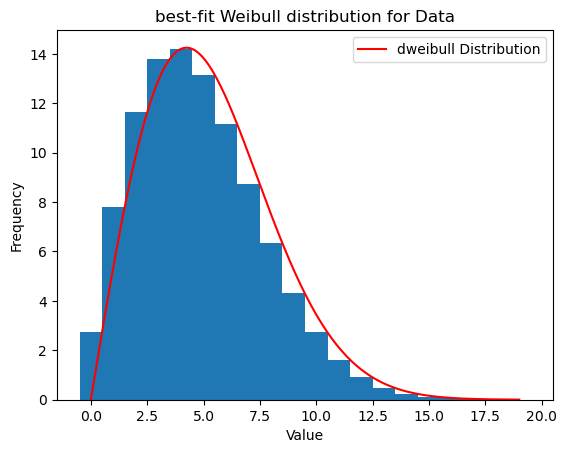

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


data = np.array([2.75, 7.80, 11.64, 13.79, 14.20, 13.15, 11.14, 8.72, 6.34, 4.30, 2.73, 1.62, 0.91, 0.48, 0.24, 0.11, 0.05, 0.02, 0.01, 0.0])  # Sample frequency values
v=np.arange(0,20,1)
s=max(data)/(stats.dweibull.pdf(v[np.argmax(data)],2,0,6))
plt.bar(v,data,1)
x=np.linspace(0,19,1000)
y=scipy.stats.dweibull.pdf(x,2,0,6)*s

plt.plot(x,y,color='red',label="dweibull Distribution")


plt.legend()

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('best-fit Weibull distribution for Data')
plt.show()


<h1>QUESTION 4
    <h4>Generate two arrays of size 1000 drawn from a Gaussian distribution of mean of zero and standard
deviation of one. Calculate Pearson correlation coefficient and its p−value using scipy module. Also
check if the p− value agrees with that calculated using the Student-t distibution.

In [18]:
n=np.random.normal(0,1,1000)
m=np.random.normal(0,1,1000)
r,p=scipy.stats.pearsonr(n,m)
xx=r*(np.sqrt((1000-2)/(1-(r**2))))

cc=scipy.stats.t.cdf(xx,998)
p_value = 2 * (1-cc)

In [19]:
print("P_value from Pearson correlation:",p,"\n")
print("Pearson correlation coefficient is :  ",r,"\n")
print("P_value calculated using the Student-t distibution: ",p_value)

P_value from Pearson correlation: 0.9297683594181466 

Pearson correlation coefficient is :   0.0027905987973878745 

P_value calculated using the Student-t distibution:  0.9297683594181467
